# Understanding business problem


### Features of the data

1. LoanID = Unique Loan ID
2. Gender = Male/ Female
3. Married = Applicant married (Y/N)
4. Dependents = Number of dependents
5. Education = Applicant Education (Graduate/ Under Graduate)
6. SelfEmployed = Self-employed (Y/N)
7. ApplicantIncome = Applicant income
8. CoapplicantIncome = Coapplicant income
9. LoanAmount = Loan amount in thousands
10. LoanAmountTerm = Term of the loan in months
11. CreditHistory = Credit history meets guidelines 
12. PropertyArea = Urban/ Semi-Urban/ Rural
13. LoanStatus = (Target) Loan approved (Y/N)

# Import libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data_train = pd.read_csv('./loan_train.csv')
raw_data_test = pd.read_csv('./loan_test.csv')

In [3]:
raw_data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
raw_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
raw_data_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#Check the size of train/test dataset
print("The size of train dataset is: ", raw_data_train.shape)
print("The size of test dataset is: ", raw_data_test.shape)

The size of train dataset is:  (614, 13)
The size of test dataset is:  (367, 12)


So we have 614 rows and 13 columns in the dataset.

In [7]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
raw_data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
raw_data_train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Data Preperation

### Copy the raw data

In [10]:
data = raw_data_train.copy(deep=True)

In [11]:
data = data.drop(columns=['Loan_ID'])

In [12]:
data['Credit_History'] = data['Credit_History'].astype('object')

In [13]:
numcols = data.select_dtypes(include=np.number).columns
objcols = data.select_dtypes(include='object').columns

# Data Prepocessing

## Finding & Handling missing values

### Finding Missing Values

In [14]:
# Initializing the lists to store the column names, missing values, and percentage of missing values
name = []  # column names list
value = []  # total missing values list
percentage = []  # missing percentage list
def missing_values_dataframe():
    # Looping through each column in the data
    for column in data.columns:

        # Check if the column has any missing values
        if data[column].isnull().any():

            # If yes, then append the column name to 'name' list
            name.append(column)

            # Append the number of missing values to 'value' list
            value.append(data[column].isnull().sum())

            # Append the percentage of missing values to 'percentage' list
            percentage.append(
                f'{round(data[column].isna().sum()/data.shape[0]*100, 3)}%')

        # If there are no missing values in the entire dataset
        elif data.isnull().any() is False:

            # Print a message indicating that there are no missing values in the dataset
            print("There is no missing values present in this dataset")

    # Creating a dataframe with the lists 'name', 'value', and 'percentage'
    return pd.DataFrame(
        {
            'Name': name, 
            'Value': value, 
            'Percentage': percentage
        }
    ).sort_values(by='Percentage', ascending=False).reset_index(drop=True)

missing_values_dataframe()

,Name,Value,Percentage
0,Credit_History,50,8.143%
1,Self_Employed,32,5.212%
2,LoanAmount,22,3.583%
3,Dependents,15,2.443%
4,Loan_Amount_Term,14,2.28%
5,Gender,13,2.117%
6,Married,3,0.489%


In [15]:
data[data.isnull().any(axis=1)].shape[0]

134

In [24]:
data['Gender'].fillna(value=data['Gender'].mode())

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [25]:
for column in data[objcols]:
    data[column] = data[column].fillna(data[column].mode())



In [22]:
# from sklearn.impute import SimpleImputer
# imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer_mode.fit_transfrom(data[objcols].values)

AttributeError: 'SimpleImputer' object has no attribute 'fit_transfrom'

In [ ]:
pd.DataFrame({
    'Column_Name'         : list(data.nunique().index), 
    'No.of Unique Values' : list(data.nunique()), 
    'Data_type'           : [data[column].dtypes for column in data.columns]
    }).sort_values(by='Data_type')

,Column_Name,No.of Unique Values,Data_type
5,ApplicantIncome,505,int64
6,CoapplicantIncome,287,float64
7,LoanAmount,203,float64
8,Loan_Amount_Term,10,float64
0,Gender,2,object
1,Married,2,object
2,Dependents,4,object
3,Education,2,object
4,Self_Employed,2,object
9,Credit_History,2,object


In [ ]:
objcols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
for column in objcols:
    print(data[column].value_counts())
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


1.0    475
0.0     89
Name: Credit_History, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




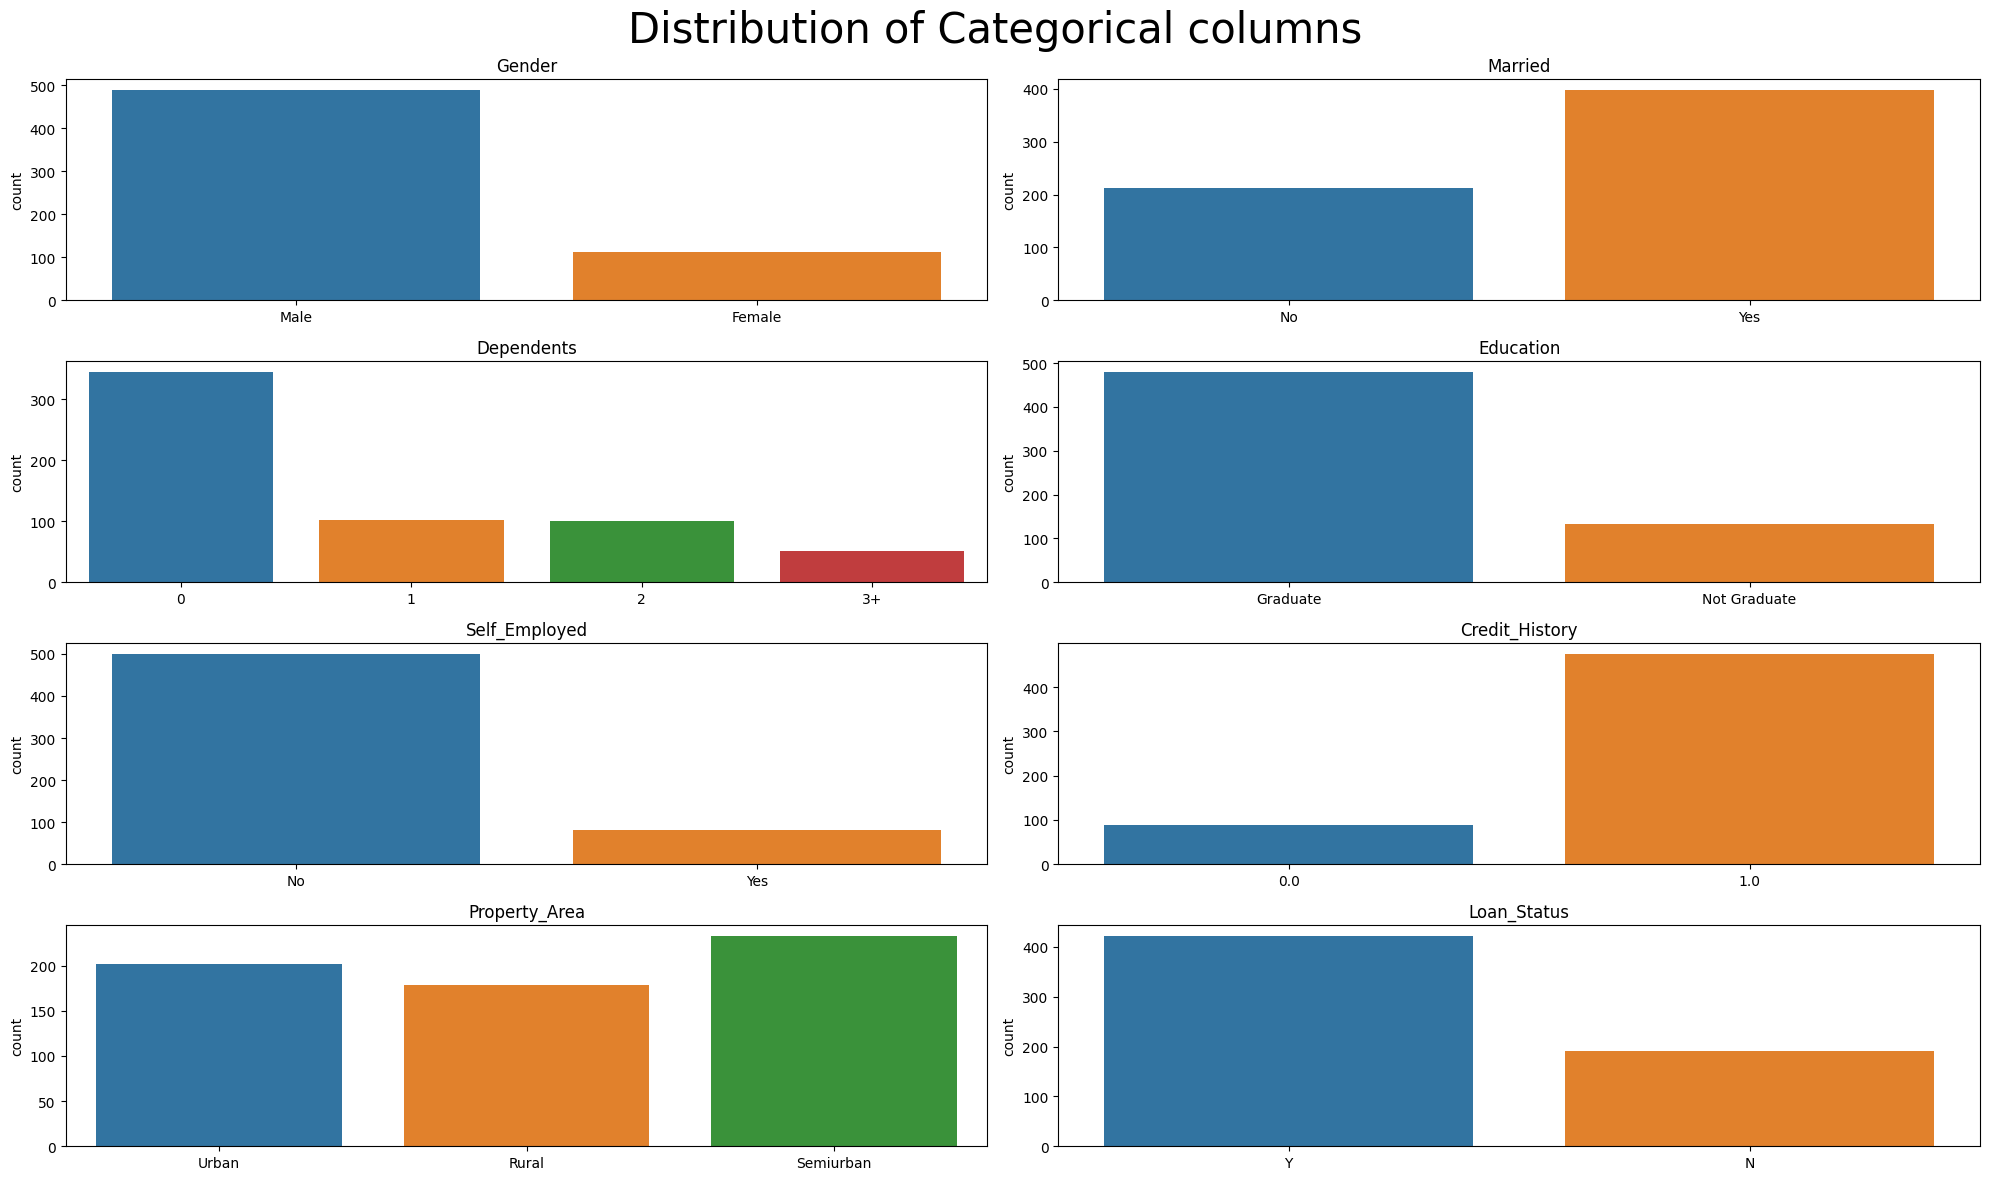

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 12))

axes = axes.flat

for index, column in enumerate(objcols):
    sns.countplot(
        data=data,
        x=column,
        ax=axes[index]
    )
    axes[index].set_xlabel('')
    axes[index].set_title(column)

fig.suptitle('Distribution of Categorical columns', size=30)
fig.tight_layout()
plt.show()

In [ ]:
numcols.size

4

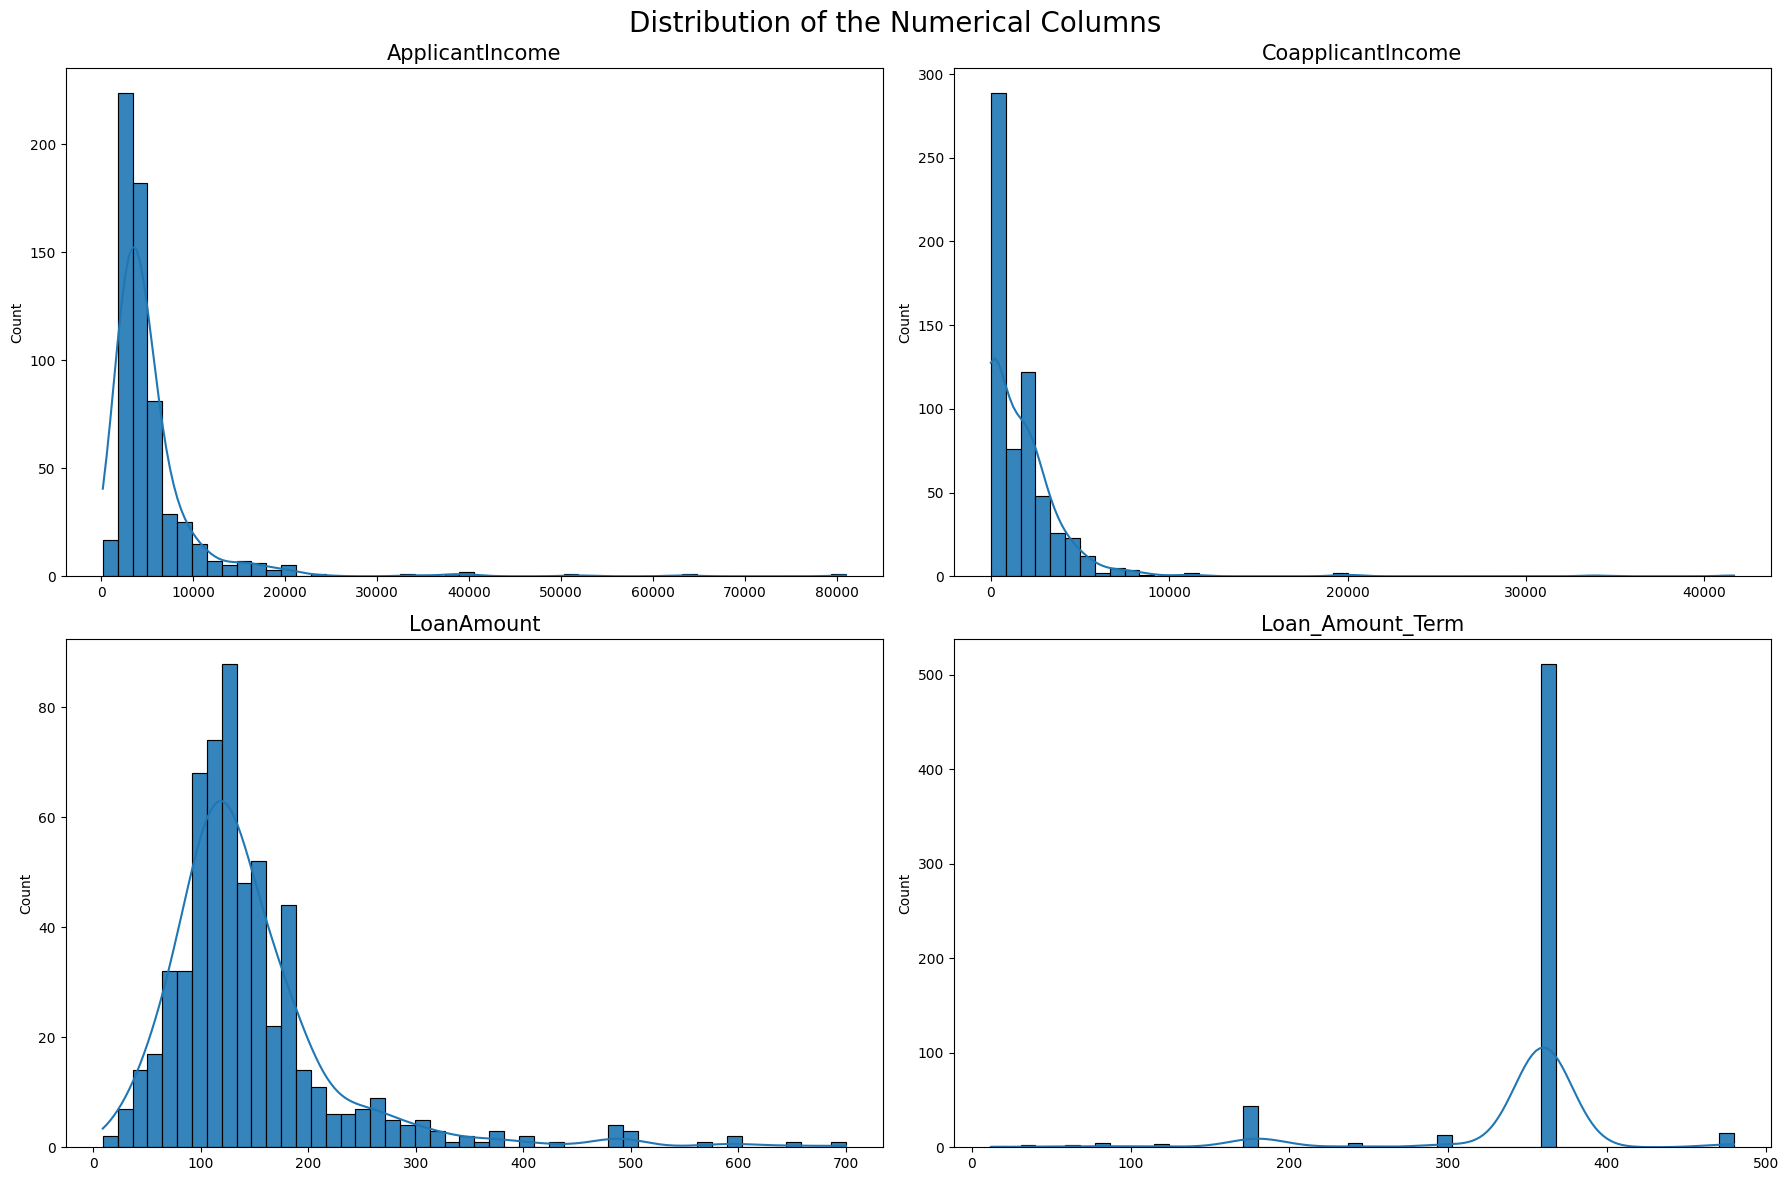

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
axes = axes.flat
for index, column in enumerate(numcols):
    sns.histplot(
        data=data,
        x=column,
        kde=True,
        bins=50,
        alpha=0.9,
        ax=axes[index]
)
# removes the x-axis label of the current subplot
    axes[index].set_xlabel('')
    
    # sets the title of the current subplot to the current column name
    axes[index].set_title(column, size=15)
    
# set the title for the plot    
plt.suptitle('Distribution of the Numerical Columns', size=20)

# adjusts the spacing between subplots to optimize the layout
plt.tight_layout()

# displays the figure on the screen
plt.show()

In [ ]:
numcols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [ ]:
non_dist_cols = []

In [ ]:
fig,ax = plt.subplots(len(non_dist_cols),5, figsize = (30,15))
for i,col in enumerate(non_dist_cols):
    #scale
    scaler = QuantileTransformer(output_distribution="normal")
    quant_df = scaler.fit_transform(df_train[[col]])

    sns.histplot(x= df_train[col],ax= ax[i,0], color = "r")
    sns.histplot(quant_df,ax= ax[i,1] )
    sns.histplot(np.log1p(df_train[col]), ax = ax[i,2], color= "orange")
    try:
        sns.histplot(boxcox(df_train[col])[0], ax = ax[i,3], color= "orange")
    except:
        pass
    sns.histplot(np.sqrt(df_train[col]), ax = ax[i,4], color= "green")
    ax[i,0].set_title(f"Orginal ({col})")
    ax[i,0].set(xlabel=None)
    ax[i,1].set_title(f"Quantile Scaling ({col})")
    ax[i,2].set_title(f"Log transform ({col})")
    ax[i,2].set(xlabel=None)
    ax[i,3].set_title(f"Boxcox ({col})")
    ax[i,4].set_title(f"Square Root ({col})")
plt.suptitle("Distribution Transformations",fontsize = 30)
plt.tight_layout(pad = 4)
plt.show()